In [1]:
# This line allows you to display matplotlib plots within the Jupyter Notebook
%matplotlib inline

# Import External packages 

import os
import numpy as np
import matplotlib.pyplot as plt

# Configure the working directory (Important: This should be set to home directory of 'dynworm' folder)

default_dir = os.path.dirname(os.getcwd())
os.chdir(default_dir)

# Import Main module

import dynworm as dw

In [2]:
# Setting AVL to True enable its voltage gated channels to support action potential as described by Qiang et al 2022
# https://www.nature.com/articles/s41467-022-30452-y

additional_params = {"AWA": False,
                     "AVL": True}

In [3]:
# Provide additional_params to initialize_params_neural() to enable spiking AVL neuron

dw.network_sim.initialize_params_neural(additional_params = additional_params)
dw.network_sim.initialize_connectivity()

Using the default neural parameters
Nonlinear neural parameters enabled
Using the default connectivity


In [4]:
input_vec = np.zeros(dw.network_sim.params_obj_neural['N'])
ablation_mask = np.ones(dw.network_sim.params_obj_neural['N'], dtype = 'bool')

In [5]:
print(dw.utils.neuron_names_2_inds(['AVL']))

[124]


In [6]:
# Ablating AVL disconnets it from the rest of the network so there is no synaptic or gap currents from other neurons
# This emulates the experimental setting Qiang used to measure the spikes of AVL neuron with real C. elegans
# If including spiking AVL neuron as part of the network dynamics skip this step

ablation_mask[124] = False

In [7]:
# Seaborn plot setting

import seaborn as sns

sns.set(style = 'ticks', font_scale = 2.1)

12
Network integration prep completed...
Computing network dynamics with Julia engine...


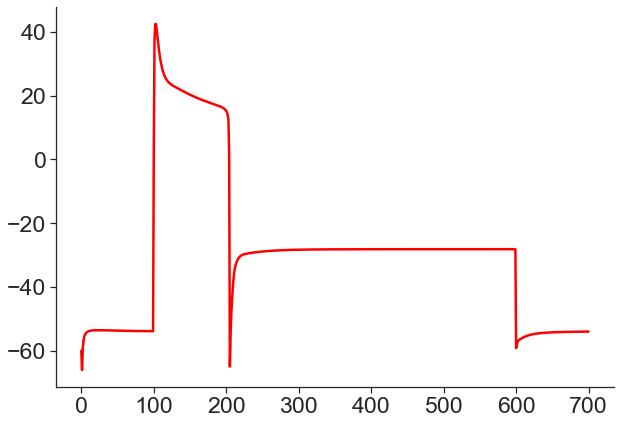

314.0223424434662
10
Network integration prep completed...
Computing network dynamics with Julia engine...


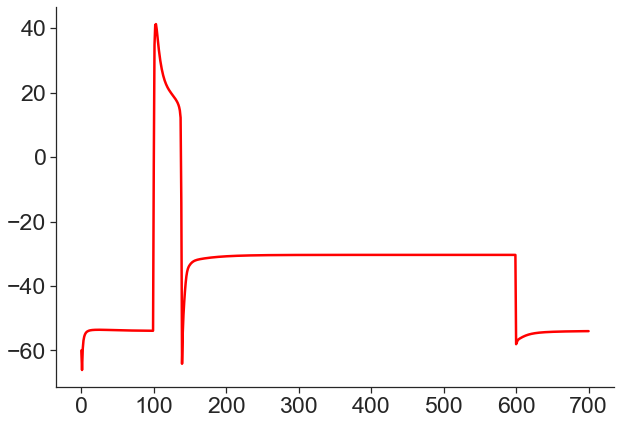

268.68076729774475
8
Network integration prep completed...
Computing network dynamics with Julia engine...


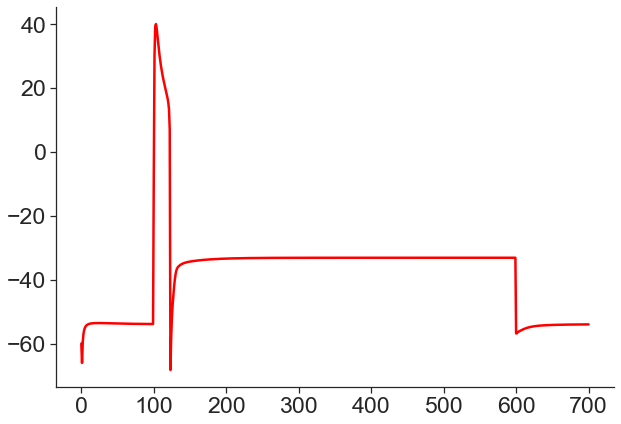

270.46371841430664
6
Network integration prep completed...
Computing network dynamics with Julia engine...


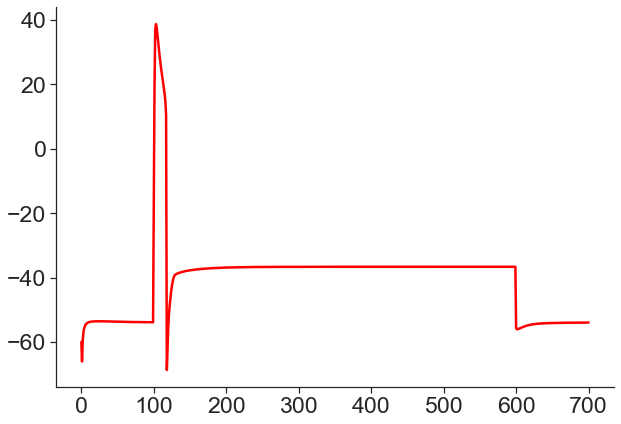

248.75503373146057
4
Network integration prep completed...
Computing network dynamics with Julia engine...


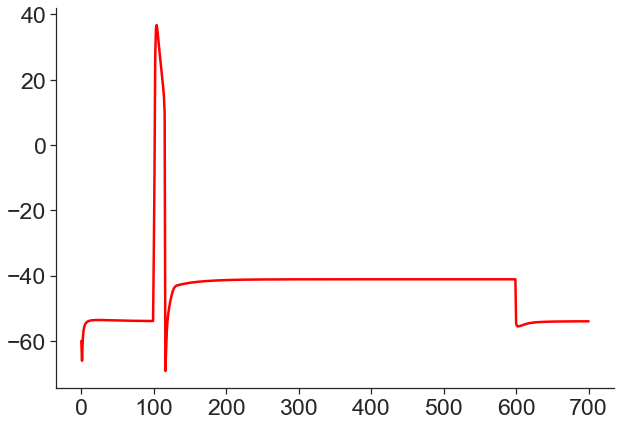

262.71995306015015
2
Network integration prep completed...
Computing network dynamics with Julia engine...


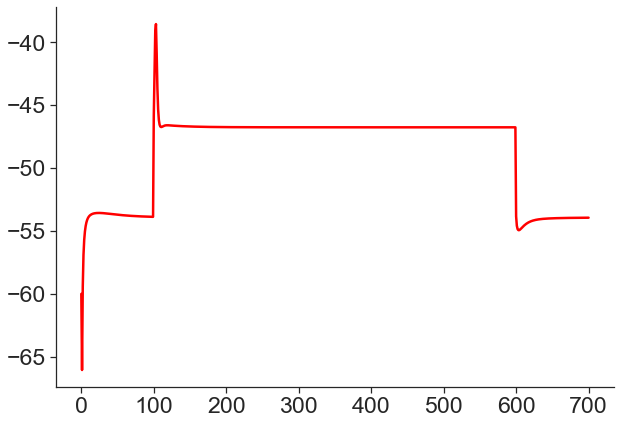

161.8970582485199
0
Network integration prep completed...
Computing network dynamics with Julia engine...


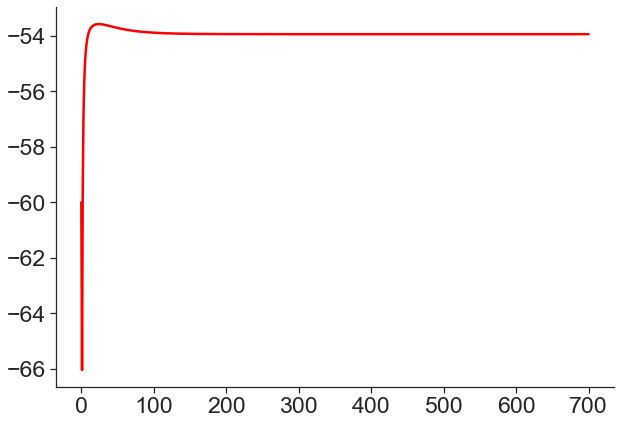

71.62322521209717
-2
Network integration prep completed...
Computing network dynamics with Julia engine...


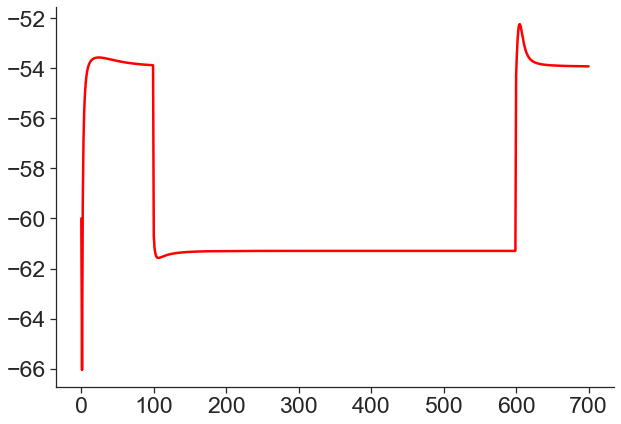

152.70046544075012
-4
Network integration prep completed...
Computing network dynamics with Julia engine...


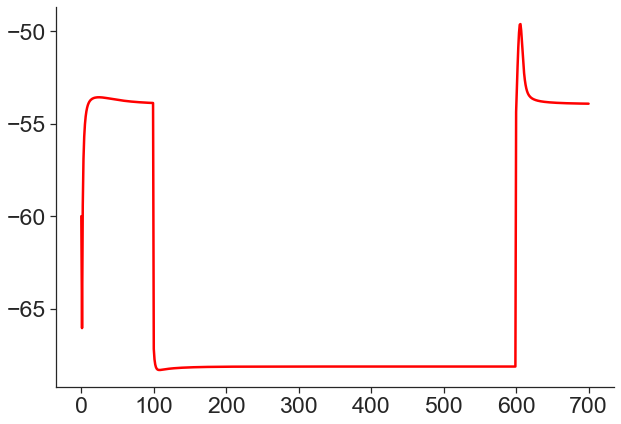

166.16544246673584


In [8]:
# A for loop where each loop simulates the voltage activity of AVL when given input current ranging from -2pA to 12pA
# Reproduces Figure 4C from https://www.nature.com/articles/s41467-022-30452-y

import time

AVL_external_input_current_list = np.arange(-2, 7) * 2
avl_voltage_sols = []

for stim in AVL_external_input_current_list[::-1]:
    
    print(stim)
    
    start = time.time()

    input_mat = np.zeros((701, 279))
    input_mat[100:600, 124] = stim
    
    result_dict_network = dw.network_sim.run_network_dyninput(input_mat = input_mat, ablation_mask = ablation_mask)
    v_sol = result_dict_network['raw_v_solution']
    
    avl_voltage_sols.append(v_sol[:, 124])
    
    plt.figure(figsize = (10, 7))

    plt.plot(v_sol[:, 124], linewidth = 2.5, color = 'red')
    sns.despine()
    plt.show()
    
    end = time.time()
    print(end - start)

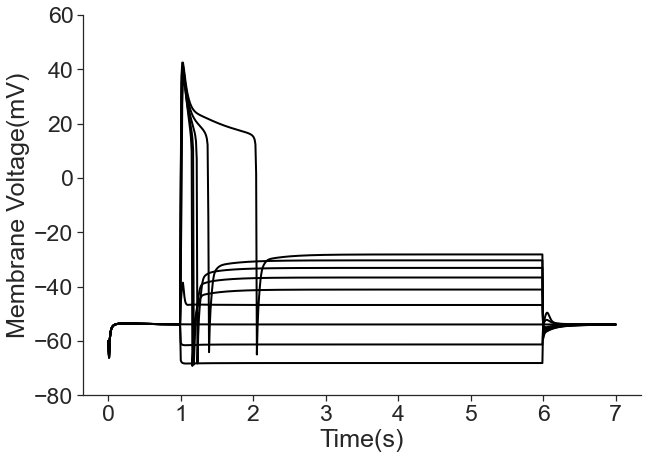

In [9]:
plt.figure(figsize = (10, 7))

for k in range(len(avl_voltage_sols)):

    plt.plot(np.linspace(0, 7, 701), avl_voltage_sols[k], linewidth = 2., color = 'black')
    plt.ylim(-80, 60)
    plt.xlabel('Time(s)')
    plt.ylabel('Membrane Voltage(mV)')
    sns.despine()